To understand how the imbalanced data can be balanced using the Under-sampling method and understand how the ML Models perform with the sampled data.

For this purpose, I have combined the data of both the Test and Train dataset and the under sampling method has been applied. Only the accuracy score and the confusion matrix for each model has been evaluated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import machine learning modules
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score,  classification_report
from warnings import simplefilter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Download training data
import pandas as pd
train_id = '1RU-2LylB_GyZQGEYSnJG8kKYv_z6nPDF'
downloaded = drive.CreateFile({'id':train_id}) 
downloaded.GetContentFile('mitbih_train.csv')  
mitbih_train_data = pd.read_csv('mitbih_train.csv', names = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',
                       'x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
                       'x21','x22','x23','x24','x25','x26','x27','x28','x29','x30',
                       'x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
                       'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50',
                       'x51','x52','x53','x54','x55','x56','x57','x58','x59','x60',
                       'x61','x62','x63','x64','x65','x66','x67','x68','x69','x70',
                       'x71','x72','x73','x74','x75','x76','x77','x78','x79','x80',
                       'x81','x82','x83','x84','x85','x86','x87','x88','x89','x90',
                       'x91','x92','x93','x94','x95','x96','x97','x98','x99','x100',
                       'x101','x102','x103','x104','x105','x106','x107','x108','x109','x110',
                       'x111','x112','x113','x114','x115','x116','x117','x118','x119','x120',
                       'x121','x122','x123','x124','x125','x126','x127','x128','x129','x130',
                       'x131','x132','x133','x134','x135','x136','x137','x138','x139','x140',
                       'x141','x142','x143','x144','x145','x146','x147','x148','x149','x150',
                       'x151','x152','x153','x154','x155','x156','x157','x158','x159','x160',
                       'x161','x162','x163','x164','x165','x166','x167','x168','x169','x170',
                       'x171','x172','x173','x174','x175','x176','x177','x178','x179','x180',
                       'x181','x182','x183','x184','x185','x186','x187','Target'])
mitbih_train_data.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,Target
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.621667,0.636667,0.651667,0.665000,0.681667,0.700000,0.711667,0.735000,0.763333,0.785000,0.810000,0.835000,0.856667,0.876667,0.880000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,0.097959,0.048980,0.036735,0.053061,0.053061,0.097959,0.183673,0.269388,0.351020,0.408163,0.436735,0.469388,0.481633,0.518367,0.530612,0.534694,0.555102,0.591837,0.628571,0.632653,0.624490,0.616327,0.616327,0.608163,0.608163,0.620408,0.628571,0.624490,0.632653,0.644898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,0.101266,0.101266,0.088608,0.081013,0.073418,0.065823,0.065823,0.053165,0.048101,0.037975,0.035443,0.025316,0.020253,0.020253,0.017722,0.002532,0.005063,0.007595,0.000000,0.010127,0.010127,0.015190,0.035443,0.040506,0.050633,0.058228,0.070886,0.086076,0.098734,0.106329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,0.370800,0.287370,0.236385,0.324450,0.403244,0.409038,0.407880,0.390498,0.390498,0.419467,0.443801,0.487833,0.544612,0.574739,0.582851,0.592121,0.601390,0.611819,0.624565,0.634994,0.650058,0.661645,0.677868,0.691773,0.712630,0.726535,0.741599,0.749710,0.761298,0.763615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
# Download test data
test_id = '1hx4E06B2KXFavgSoxNjX7VcVVSh0S5w0'
downloaded = drive.CreateFile({'id':test_id})
downloaded.GetContentFile('mitbih_test.csv')
mitbih_test_data = pd.read_csv('mitbih_test.csv',names = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',
                       'x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
                       'x21','x22','x23','x24','x25','x26','x27','x28','x29','x30',
                       'x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
                       'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50',
                       'x51','x52','x53','x54','x55','x56','x57','x58','x59','x60',
                       'x61','x62','x63','x64','x65','x66','x67','x68','x69','x70',
                       'x71','x72','x73','x74','x75','x76','x77','x78','x79','x80',
                       'x81','x82','x83','x84','x85','x86','x87','x88','x89','x90',
                       'x91','x92','x93','x94','x95','x96','x97','x98','x99','x100',
                       'x101','x102','x103','x104','x105','x106','x107','x108','x109','x110',
                       'x111','x112','x113','x114','x115','x116','x117','x118','x119','x120',
                       'x121','x122','x123','x124','x125','x126','x127','x128','x129','x130',
                       'x131','x132','x133','x134','x135','x136','x137','x138','x139','x140',
                       'x141','x142','x143','x144','x145','x146','x147','x148','x149','x150',
                       'x151','x152','x153','x154','x155','x156','x157','x158','x159','x160',
                       'x161','x162','x163','x164','x165','x166','x167','x168','x169','x170',
                       'x171','x172','x173','x174','x175','x176','x177','x178','x179','x180',
                       'x181','x182','x183','x184','x185','x186','x187','Target'])
mitbih_test_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,Target
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
mitbih_test_data["Target"].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: Target, dtype: int64

In [7]:
mitbih_train_data["Target"].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Target, dtype: int64

In [8]:
mitbih_train_data['Label']=" "

In [9]:
mitbih_train_data.dtypes

x1        float64
x2        float64
x3        float64
x4        float64
x5        float64
           ...   
x185      float64
x186      float64
x187      float64
Target    float64
Label      object
Length: 189, dtype: object

In [10]:
mitbih_test_data['Label']=" "
mitbih_test_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,Target,Label
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


N - Normal Beat (0)

S - Supraventricular Ectopic Beat (1)

V - Ventricular Ectopic Beat (2)

F - Fusion Beat (3)

Q - Unknown Beat (4)



In [11]:
#The last column which is our Target specifies the type of the beat based on each patients 
mitbih_train_data.loc[mitbih_train_data['Target'] == 0 , 'Label'] = 'N'
mitbih_train_data.loc[mitbih_train_data['Target'] == 1 , 'Label'] = 'S'
mitbih_train_data.loc[mitbih_train_data['Target'] == 2 , 'Label'] = 'V'
mitbih_train_data.loc[mitbih_train_data['Target'] == 3 , 'Label'] = 'F'
mitbih_train_data.loc[mitbih_train_data['Target'] == 4 , 'Label'] = 'Q'

In [12]:
mitbih_test_data.loc[mitbih_test_data['Target'] == 0 , 'Label'] = 'N'
mitbih_test_data.loc[mitbih_test_data['Target'] == 1 , 'Label'] = 'S'
mitbih_test_data.loc[mitbih_test_data['Target'] == 2 , 'Label'] = 'V'
mitbih_test_data.loc[mitbih_test_data['Target'] == 3 , 'Label'] = 'F'
mitbih_test_data.loc[mitbih_test_data['Target'] == 4 , 'Label'] = 'Q'

In [13]:
mitbih_train_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,Target,Label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.5266

In [14]:
mitbih_train_data.isna().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
         ..
x185      0
x186      0
x187      0
Target    0
Label     0
Length: 189, dtype: int64

In [15]:
mitbih_test_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,Target,Label
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,0.075862,0.032184,0.000000,0.012644,0.119540,0.243678,0.310345,0.367816,0.412644,0.434483,0.502299,0.533333,0.563218,0.627586,0.671264,0.685057,0.679310,0.679310,0.677011,0.681609,0.690805,0.700000,0.713793,0.736782,0.752874,0.771264,0.783908,0.800000,0.806897,0.813793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,0.289985,0.376682,0.412556,0.452915,0.529148,0.582960,0.641256,0.6621

In [16]:
mitbih_test_data.isnull().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
         ..
x185      0
x186      0
x187      0
Target    0
Label     0
Length: 189, dtype: int64

In [17]:
# combining the two datasets 
frames = [mitbih_train_data, mitbih_test_data]

mitbih_data = pd.concat(frames)

mitbih_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,Target,Label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,0.075862,0.032184,0.000000,0.012644,0.119540,0.243678,0.310345,0.367816,0.412644,0.434483,0.502299,0.533333,0.563218,0.627586,0.671264,0.685057,0.679310,0.679310,0.677011,0.681609,0.690805,0.700000,0.713793,0.736782,0.752874,0.771264,0.783908,0.800000,0.806897,0.813793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Q
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,0.289985,0.376682,0.412556,0.452915,0.529148,0.582960,0.641256,0.6621

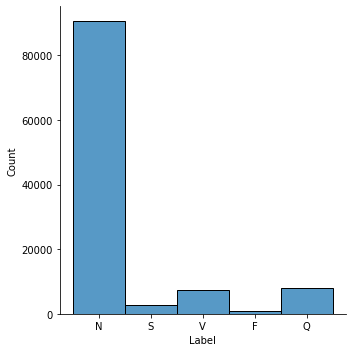

In [18]:
sns.displot(mitbih_data['Label'])

In [19]:
X = mitbih_data.drop(['Target','Label'], axis=1)
y= mitbih_data.Label
y1=mitbih_data.Target

In [20]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,0.075862,0.032184,0.000000,0.012644,0.119540,0.243678,0.310345,0.367816,0.412644,0.434483,0.502299,0.533333,0.563218,0.627586,0.671264,0.685057,0.679310,0.679310,0.677011,0.681609,0.690805,0.700000,0.713793,0.736782,0.752874,0.771264,0.783908,0.800000,0.806897,0.813793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,0.289985,0.376682,0.412556,0.452915,0.529148,0.582960,0.6412

In [21]:
y

0        N
1        N
2        N
3        N
4        N
        ..
21887    Q
21888    Q
21889    Q
21890    Q
21891    Q
Name: Label, Length: 109446, dtype: object

In [22]:
y1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: Target, Length: 109446, dtype: float64

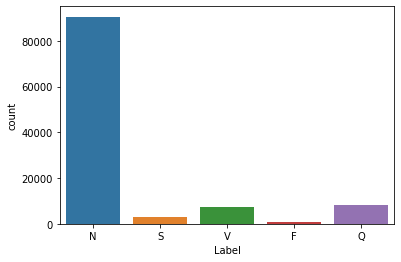

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=mitbih_data, x='Label')

In [24]:
#Inspect the distribution of the target variable: Label
mitbih_data.Label.value_counts()

N    90589
Q     8039
V     7236
S     2779
F      803
Name: Label, dtype: int64

Here we can see that there are more samples for Normal Heart beat compared to other types. Hence, we are going with the under-sampling method

In [25]:
from imblearn.under_sampling import NearMiss


In [26]:
nm=NearMiss(sampling_strategy='auto')
X_res, y_res=nm.fit_resample(X,y)

In [27]:
X_res.shape, y_res.shape

((4015, 187), (4015,))

We can see that lot of sample data has been lost here into order to under sample the Normal beats and make all samples equally balanced. This could be a disadvantage. But this process is done only for learning purpose.

In [28]:
y_res

0       F
1       F
2       F
3       F
4       F
       ..
4010    V
4011    V
4012    V
4013    V
4014    V
Name: Label, Length: 4015, dtype: object

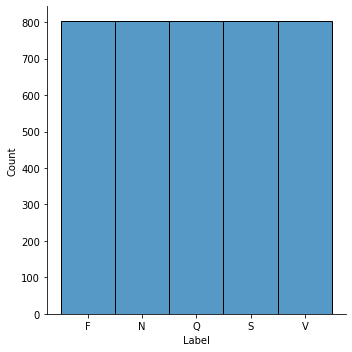

In [29]:
sns.displot(y_res)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25, random_state=10 )

**Logistic Regression**

In [31]:
# instatiate a linear model and check cross-validation performance
simplefilter("ignore")
model_lr = LogisticRegression()
cv_score = cross_val_score(model_lr, X_train, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.81260365 0.83388704 0.83388704 0.8089701  0.83388704]
0.8246469755320849


In [32]:
# train the classifier and evaluate the performance in the test set
model_lr.fit(X_train, y_train)
y_pred_lr= model_lr.predict(X_test)
# compute the accuracy
print(accuracy_score(y_test, y_pred_lr))


0.8237051792828686


In [33]:
cnf_matrix_lr=confusion_matrix(y_test, y_pred_lr,labels=('N','S','V','F','Q'))
cnf_matrix_lr

array([[208,   8,   0,   2,   0],
       [  4, 156,   7,   6,  15],
       [  2,   8, 154,  39,   7],
       [ 26,  11,  26, 134,   4],
       [  0,   6,   6,   0, 175]])

Text(0.5, 257.44, 'Predicted label')

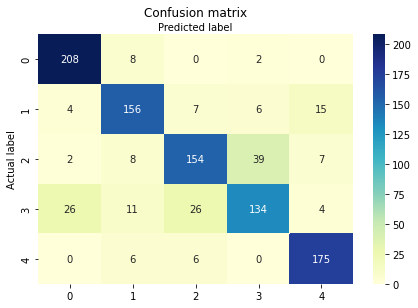

In [34]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Accuracy score using the Linear Regression model for the balanced dataset is 81%, which is less compared to the one with the imbalanced dataset. But the Confusion Matrix shows that most of the the classes have been correctly classified

**Random Forest Classifier**

In [35]:
rf_model=RandomForestClassifier()

In [36]:
rf_model.fit(X_train, y_train)
y_pred_rfc= rf_model.predict(X_test)
# compute the accuracy
print("Accuracy Score for Random Forest Classifier Model:",accuracy_score(y_test, y_pred_rfc))

Accuracy Score for Random Forest Classifier Model: 0.9083665338645418


In [37]:
cnf_matrix_rfc=confusion_matrix(y_test, y_pred_rfc,labels=('N','S','V','F','Q'))
cnf_matrix_rfc

array([[212,   0,   0,   6,   0],
       [  1, 172,   3,   3,   9],
       [  1,   6, 181,  22,   0],
       [ 16,   5,  14, 165,   1],
       [  0,   2,   3,   0, 182]])

Text(0.5, 257.44, 'Predicted label')

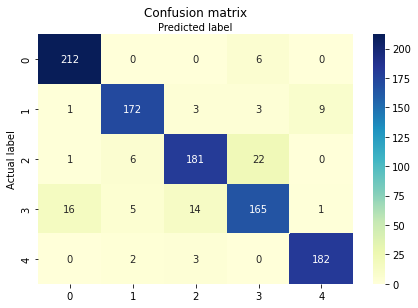

In [38]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Random forest Model also performs well with the banalced dataset.

**Support Vector Machine**

In [39]:
svc=SVC()
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_test)
# compute the accuracy
print(" Accuracy Score for Support Vector Machine Model:", accuracy_score(y_test, y_pred_svc))

 Accuracy Score for Support Vector Machine Model: 0.8794820717131474


In [40]:
cnf_matrix_svc=confusion_matrix(y_test, y_pred_svc,labels=('N','S','V','F','Q'))
cnf_matrix_svc

array([[214,   1,   0,   3,   0],
       [  2, 169,   4,   3,  10],
       [  1,   2, 178,  27,   2],
       [ 29,   7,  23, 141,   1],
       [  0,   4,   2,   0, 181]])

Text(0.5, 257.44, 'Predicted label')

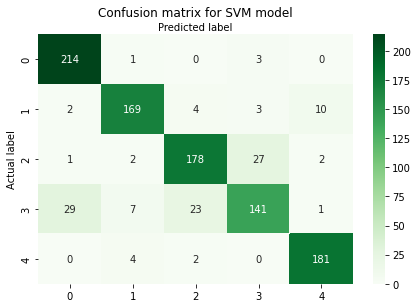

In [41]:
# Visualising the Confusion Matrix in the form of Heat Map
class_names=['N','S','V','F','Q'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True,cmap=plt.cm.Greens,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVM model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           F       0.81      0.70      0.75       201
           N       0.87      0.98      0.92       218
           Q       0.93      0.97      0.95       187
           S       0.92      0.90      0.91       188
           V       0.86      0.85      0.85       210

    accuracy                           0.88      1004
   macro avg       0.88      0.88      0.88      1004
weighted avg       0.88      0.88      0.88      1004



**K-Nearest Neighbours**

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy SCore for KNN Model:", accuracy_score(y_test, y_pred_knn))

Accuracy SCore for KNN Model: 0.8625498007968128


In [45]:
cnf_matrix_knn=print(confusion_matrix(y_test, y_pred_knn,labels=('N','S','V','F','Q')))

[[210   0   0   8   0]
 [  5 150   5  10  18]
 [  2   7 173  24   4]
 [ 28   2  15 155   1]
 [  0   6   1   2 178]]


In [46]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           F       0.78      0.77      0.78       201
           N       0.86      0.96      0.91       218
           Q       0.89      0.95      0.92       187
           S       0.91      0.80      0.85       188
           V       0.89      0.82      0.86       210

    accuracy                           0.86      1004
   macro avg       0.86      0.86      0.86      1004
weighted avg       0.86      0.86      0.86      1004



**Gradient Boost**

In [47]:
# check performance for ensemble models
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred_gb= model_gb.predict(X_test)


In [48]:
# compute the accuracy
print("Accuracy SCore for KNN Model:", accuracy_score(y_test, y_pred_gb))

Accuracy SCore for KNN Model: 0.8954183266932271


In [49]:
cnf_matrix_gb= print(confusion_matrix(y_test, y_pred_gb,labels=('N','S','V','F','Q')))

[[214   0   0   4   0]
 [  0 166   3   7  12]
 [  2   3 177  24   4]
 [ 18   6  12 163   2]
 [  0   4   3   1 179]]


In [50]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           F       0.82      0.81      0.81       201
           N       0.91      0.98      0.95       218
           Q       0.91      0.96      0.93       187
           S       0.93      0.88      0.90       188
           V       0.91      0.84      0.87       210

    accuracy                           0.90      1004
   macro avg       0.90      0.90      0.89      1004
weighted avg       0.90      0.90      0.89      1004



**Conclusion:**

After applying the ML models on the under-sampled data, we can observe that most of the data has been correctly classified as per the confusion matrix for all the models. Among them, the Random Forest Classifier and the Gradient boost seem to have a higher accuracy score and perform well.

###Identify/ rank the important features

In [51]:
#what are the important features??
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification

# # Create the RFE object and compute a cross-validated score.
# model_rf = RandomForestClassifier()
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv = RFECV(
#     estimator=model_rf,
#     step=1,
#     cv=StratifiedKFold(2),
#     scoring="accuracy",
#     min_features_to_select=min_features_to_select,
# )
# rfecv.fit(X, y)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.show()

###Getting the top 10 features

In [52]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest,chi2

#apply slectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = chi2, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the data frame columns

featureScores_sorted = featureScores.nlargest(50, 'Score').sort_values('Score',ascending=False)
print(featureScores_sorted)#print 10 best features
#print(featureScores,sorted)

    Specs        Score
3      x4  6114.285806
100  x101  5741.808634
101  x102  5725.220723
102  x103  5616.662365
99   x100  5531.021761
103  x104  5226.137552
98    x99  5120.630117
4      x5  4816.772585
104  x105  4634.401174
97    x98  4550.389694
105  x106  3825.186510
96    x97  3752.954625
95    x96  3168.323044
106  x107  3073.044269
5      x6  2907.510442
94    x95  2641.174869
107  x108  2403.877140
6      x7  2242.265784
93    x94  2196.524434
43    x44  2149.414148
44    x45  2129.181836
42    x43  2127.071437
45    x46  2067.280853
41    x42  2060.765555
46    x47  1961.380965
40    x41  1951.442413
108  x109  1853.701135
92    x93  1844.211008
47    x48  1824.800522
39    x40  1809.932409
48    x49  1663.970978
38    x39  1661.927721
186  x187  1595.378418
185  x186  1578.852908
7      x8  1551.340617
91    x92  1534.241092
184  x185  1528.080143
37    x38  1515.727199
49    x50  1512.098735
179  x180  1490.405177
180  x181  1481.443671
183  x184  1479.921906
178  x179  

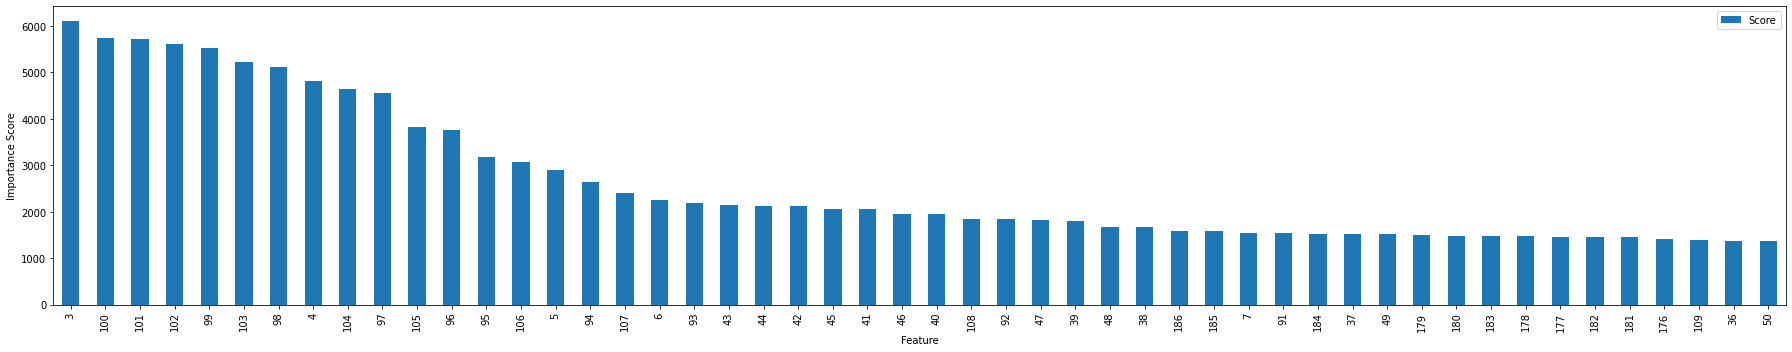

In [54]:
#Plot feature importance as bar chart
fig, ax = plt.subplots(figsize =(25,5))
featureScores_sorted.plot.bar(ax=ax)
ax.set_xlabel('Feature')
ax.set_ylabel('Importance Score')
fig.tight_layout()

[0.02199484 0.02920452 0.03168842 0.04434829 0.03962321 0.02970268
 0.03526632 0.02460142 0.01872275 0.01643211 0.02294895 0.01587849
 0.01654611 0.01293319 0.00986295 0.00924251 0.01340698 0.01090945
 0.00930784 0.00812229 0.00987573 0.01067587 0.01210829 0.01127417
 0.01332664 0.01171972 0.01023399 0.00778713 0.00667972 0.00953787
 0.00638424 0.0069609  0.01030439 0.01270919 0.0159321  0.01450201
 0.01616466 0.01139337 0.01076414 0.00937466 0.00853036 0.00678777
 0.00906984 0.00924753 0.01266418 0.01116933 0.00843967 0.01185175
 0.00906733 0.00834366 0.00521354 0.00353258 0.00495073 0.00346586
 0.00318381 0.00384101 0.00375462 0.00438984 0.00364806 0.00375163
 0.00313019 0.00327473 0.00292559 0.00318286 0.00253513 0.0022051
 0.00254479 0.00208995 0.00238724 0.00240091 0.00244884 0.0024354
 0.00236021 0.00249154 0.00249417 0.00205455 0.00249222 0.0022027
 0.0027066  0.00211217 0.00260888 0.00273933 0.00203571 0.00269931
 0.00314456 0.00317789 0.00312315 0.00338152 0.00295959 0.0025558

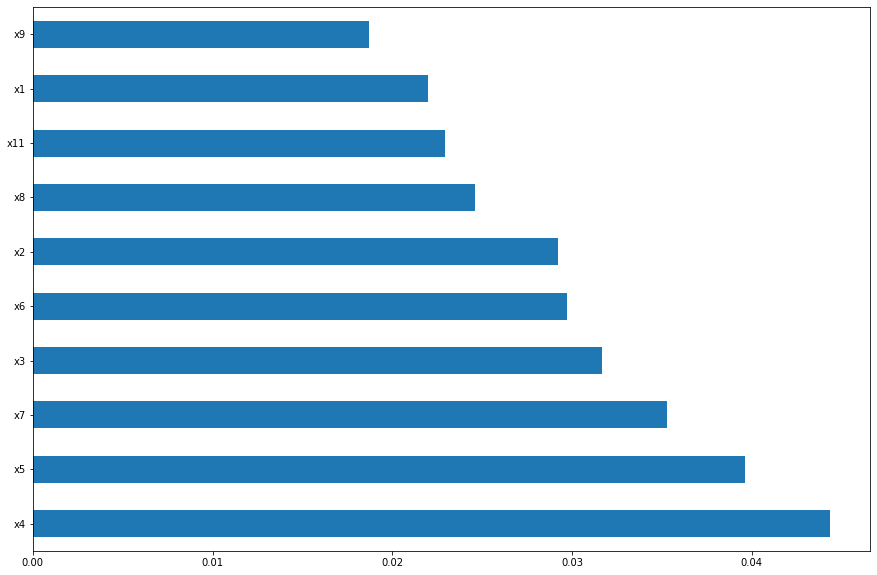

In [57]:
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt 
model = RandomForestClassifier () 
model.fit(X,y)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization 
fig,ax = plt.subplots(figsize = (15,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances_sorted = feat_importances.nlargest(50).sort_values(ascending=False)

feat_importances.nlargest(10).plot(kind='barh') 
plt.show()